# Pandas Test - Real life Exercise

In [1]:
import pandas as pd

In [152]:
#pip install cufflinks

In [154]:
#pip install plotly_express

For visualizations:

In [155]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [6]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
208559,2021-week_47,AD07XRPH6R,MoJoe Brewing Company,IN,no,True,Yield,UserPopY
366969,2022-week_52,AD07MX986M,RelayFoods,JP,yes,NaN,Qality,UserPopQ
202792,2021-week_47,AD08CZHK8V,Search Million Culture,DE,yes,NaN,Qality,DNNQ
296849,2022-week_02,AD088F8QMS,Fancy,US,yes,NaN,Qality,RNNQ
115649,2021-week_41,AD00LLUEJF,Fry Multimedia,DE,yes,NaN,Qality,UserPopQ


In [7]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()

In [8]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [9]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

In [10]:
if ad_recs_annotated.duplicated().any():
    print("There are duplicate records.")
else:
    print("There are no duplicate records.")

There are duplicate records.


## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [11]:
#1
ad_recs_annotated['sample_year']=ad_recs_annotated['week_id'].str[:4]


In [12]:
print(ad_recs_annotated['week_id'].str[10:].astype(int))



0         33
1         33
2         33
3         33
4         33
          ..
373783    52
373784    52
373785    52
373786    52
373787    52
Name: week_id, Length: 373788, dtype: int32


In [219]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,week,is_sever_new
0,2021-week_33,AD0088VOS,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33,NaN
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,1,NaN,Yield,DNNY,2021,33,NaN
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33,NaN
3,2021-week_33,AD89608808,Search Million Culture,DE,1,NaN,Qality,BooksQ,2021,33,NaN
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33,NaN
...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,1,NaN,Yield,DNNY,2022,52,NaN
373784,2022-week_52,AD07C8XSMN,Fancy,US,1,NaN,Qality,RNNQ,2022,52,NaN
373785,2022-week_52,AD096LRR88,Extreme DA,US,1,NaN,Yield,DNNY,2022,52,NaN
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,1,NaN,Qality,DNNQ,2022,52,NaN


In [220]:

ad_recs_annotated['quarter'] = pd.PeriodIndex(pd.to_datetime(ad_recs_annotated['sample_year'], format='%Y'), freq='Q').quarter
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,week,is_sever_new,quarter
0,2021-week_33,AD0088VOS,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33,NaN,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,1,NaN,Yield,DNNY,2021,33,NaN,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33,NaN,1
3,2021-week_33,AD89608808,Search Million Culture,DE,1,NaN,Qality,BooksQ,2021,33,NaN,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,1,NaN,Yield,DNNY,2022,52,NaN,1
373784,2022-week_52,AD07C8XSMN,Fancy,US,1,NaN,Qality,RNNQ,2022,52,NaN,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,1,NaN,Yield,DNNY,2022,52,NaN,1
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,1,NaN,Qality,DNNQ,2022,52,NaN,1


In [ ]:
#3
outcome_map = {'yes': 1, 'no': 0}
ad_recs_annotated['success'] =ad_recs_annotated['is_success'].map(outcome_map)

In [ ]:
#4
num_NaN = ad_recs_annotated['is_sever'].isna().sum()

print(num_NaN)

In [14]:
#5
ad_recs_annotated['is_success'] = ad_recs_annotated['is_success'].str.capitalize()

In [15]:
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year
257551,2021-week_50,AD088T878Y,Fancy,US,Yes,NaN,Qality,XGBQ,2021
6798,2021-week_33,AD08T8C8SR,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2021
58643,2021-week_37,AD0888M88C,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021
341767,2022-week_05,AD078M9ZN8,Search Million Culture,US,Yes,NaN,Qality,UserPopQ,2022
140759,2021-week_42,AD00SWY0H8,Extreme DA,US,Yes,NaN,Yield,RNNY,2021


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [16]:
#there are duplicate I assume that its new req 

In [17]:
#1
count_us= ad_recs_annotated.query('region == "US"')['week_id'].count()
print(count_us)


103846


In [18]:
#2
count_us_succ= ad_recs_annotated.query('region == "US" and is_success=="Yes"')['week_id'].count()
print(count_us_succ)


88918


In [19]:
#3
#add week col
ad_recs_annotated['week']=ad_recs_annotated['week_id'].str[10:].astype(int)



In [20]:
count_us_succ_52= ad_recs_annotated.query('region == "US" and is_success=="Yes" and week==52 ').groupby('sample_year')['week_id'].count()
print(count_us_succ_52)
#I dont want to assume that 52 week is only in one year

sample_year
2022    3342
Name: week_id, dtype: int64


In [21]:
#4
count_req= ad_recs_annotated.query('rec_provider=="DNNQ" or rec_provider=="RNNY" or rec_provider=="UserPopQ"')['week_id'].count()
print(count_req)

200093


In [22]:
#5
################################

In [23]:
#6 ######## add the select

count_2022= ad_recs_annotated.query('sample_year == "2022" ')
print(count_2022)
print(count_2022['week_id'].count())

             week_id       ad_id               requester region is_success  \
271615  2022-week_01  AD07PX8V89   MoJoe Brewing Company     DE        Yes   
271616  2022-week_01  AD08XFPDPN  Search Million Culture     DE        Yes   
271617  2022-week_01  AD079G86YX              RelayFoods     DE        Yes   
271618  2022-week_01  AD087J9J8D          Fry Multimedia     DE        Yes   
271619  2022-week_01  AD08DKR8JP  Search Million Culture     DE        Yes   
...              ...         ...                     ...    ...        ...   
373783  2022-week_52  AD08KQ8GDG              Extreme DA     US        Yes   
373784  2022-week_52  AD07C8XSMN                   Fancy     US        Yes   
373785  2022-week_52  AD096LRR88              Extreme DA     US        Yes   
373786  2022-week_52  AD08FWNFDO              RelayFoods     US        Yes   
373787  2022-week_52  AD00NATC8M           Tab Solutions     US        Yes   

       is_sever recommendation_type rec_provider sample_year  w

In [24]:
print(type(ad_recs_annotated['week'][0]))

<class 'numpy.int32'>


In [25]:
#7

count_30_to_40= ad_recs_annotated.query('week > 30 and week < 40 ')['week_id']
print(count_30_to_40)
print(count_30_to_40.count())

0         2021-week_33
1         2021-week_33
2         2021-week_33
3         2021-week_33
4         2021-week_33
              ...     
100640    2021-week_39
100641    2021-week_39
100642    2021-week_39
100643    2021-week_39
100644    2021-week_39
Name: week_id, Length: 100645, dtype: object
100645


In [26]:
#8
#step 1 find the most popular:
#popular = ad_recs_annotated['week_id'].groupby('ad_id').count()
popular = ad_recs_annotated.groupby('ad_id')['week_id'].count().idxmax()

sub_pop= ad_recs_annotated.query('ad_id == @popular')['week_id']
print(sub_pop)
###############################################

7031      2021-week_33
7032      2021-week_33
20010     2021-week_34
20011     2021-week_34
35214     2021-week_35
              ...     
363533    2022-week_52
363534    2022-week_52
363535    2022-week_52
363536    2022-week_52
365817    2022-week_52
Name: week_id, Length: 247, dtype: object


In [27]:
#9
least = ad_recs_annotated.groupby('rec_provider')['week_id'].count().idxmin()

sub_pop= ad_recs_annotated.query('rec_provider == @least')['week_id']
print(sub_pop)

352263    2022-week_06
352326    2022-week_06
352578    2022-week_06
352595    2022-week_06
352703    2022-week_06
352714    2022-week_06
352738    2022-week_06
352740    2022-week_06
352745    2022-week_06
352803    2022-week_06
352896    2022-week_06
352996    2022-week_06
353173    2022-week_06
353326    2022-week_06
353442    2022-week_06
353456    2022-week_06
353478    2022-week_06
353524    2022-week_06
353551    2022-week_06
353781    2022-week_06
353845    2022-week_06
Name: week_id, dtype: object


In [28]:
#10
sever_NaN = ad_recs_annotated.query('is_sever.isna()')
print(sever_NaN)
print('Number of records with NaN value:' , sever_NaN['week_id'].count())

             week_id       ad_id               requester region is_success  \
0       2021-week_33   AD0088VOS  Search Million Culture     DE        Yes   
1       2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        Yes   
2       2021-week_33  AD08PDP6Y9  Search Million Culture     DE        Yes   
3       2021-week_33  AD89608808  Search Million Culture     DE        Yes   
4       2021-week_33  AD07CMVHP6  Search Million Culture     DE        Yes   
...              ...         ...                     ...    ...        ...   
373783  2022-week_52  AD08KQ8GDG              Extreme DA     US        Yes   
373784  2022-week_52  AD07C8XSMN                   Fancy     US        Yes   
373785  2022-week_52  AD096LRR88              Extreme DA     US        Yes   
373786  2022-week_52  AD08FWNFDO              RelayFoods     US        Yes   
373787  2022-week_52  AD00NATC8M           Tab Solutions     US        Yes   

       is_sever recommendation_type rec_provider sample_year  w

In [29]:
#11 Select the data in which the requester is a 3 word company
#requester_3 = ad_recs_annotated[ad_recs_annotated['requester'].str.split().str.len() == 3]['requester']
#print(requester_3)
requester_3 = ad_recs_annotated.query("requester.str.split().str.len() == 3")["requester"]
print(requester_3)

print(requester_3.count())
###################################################################################
#s = "I Love you"
#print(len(s.split(' ')))

0         Search Million Culture
1          MoJoe Brewing Company
2         Search Million Culture
3         Search Million Culture
4         Search Million Culture
                   ...          
373663     MoJoe Brewing Company
373689     MoJoe Brewing Company
373691     MoJoe Brewing Company
373722    Search Million Culture
373728     MoJoe Brewing Company
Name: requester, Length: 118141, dtype: object
118141


In [30]:
#12  Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
requester_3_6 = ad_recs_annotated.query("requester.str.split().str.len() == 3 and '6' in ad_id")["requester"]
print(requester_3_6)
###########################################

Series([], Name: requester, dtype: object)


In [31]:
#13 Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

In [32]:
#1 How many weeks available in the data? Are there any missing weeks?
week_exists= ad_recs_annotated['week'].unique()
count_missing_week=0
for i in range(52):
    if i not in week_exists:
        count_missing_week+=1
print(count_missing_week)

27


In [33]:
# one liner
count_missing_week = len([i for i in range(52) if i not in week_exists])
print(count_missing_week)

27


In [34]:
#2
region =  ad_recs_annotated['region'].unique()
print('Number of regions:', len(region))

A= ad_recs_annotated.groupby('region')['week'].count()
A


Number of regions: 5


region
DE     62177
GB     82984
IN     83154
JP     41627
US    103846
Name: week, dtype: int64

In [35]:
result = ad_recs_annotated.groupby(['region', 'week']).agg({'week': pd.Series.nunique})

# rename the resulting column to 'count'
result = result.rename(columns={'week': 'count'})

# group by region and sum the counts
result = result.groupby('region').sum()

# print the result
print(result)

        count
region       
DE         26
GB         26
IN         26
JP         25
US         26


In [36]:
#3How many ads are being sent to annotation in each region per week?
A= ad_recs_annotated.groupby(['region','week'])['week_id'].count()
A

region  week
DE      1       2402
        2       2394
        3       2378
        4       2365
        5       2382
                ... 
US      48      4010
        49      3994
        50      3991
        51      3996
        52      3998
Name: week_id, Length: 129, dtype: int64

In [37]:
#4 How many None values are there in is_sever column?

In [38]:
#5 Are ads being sent more than one time in a given week?
#A= ad_recs_annotated.groupby(['week','ad_id'])['ad_id'].count().loc[lambda x: x['count'] > 1]
A = ad_recs_annotated.groupby(['week', 'ad_id'])['ad_id'].count().reset_index(name='count').loc[lambda x: x['count'] > 1]

A
#what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
##################

,week,ad_id,count
0,1,AD000068FZ,2
29,1,AD0000C78C,2
37,1,AD000688KC,2
53,1,AD00087EGI,2
58,1,AD000888DY,2
...,...,...,...
358700,52,AD88868888,2
358708,52,AD88886888,2
358719,52,AD88888877,2
358721,52,AD88888888,3


In [39]:
max_add = A.max()
max_add

week             52
ad_id    AD98908668
count            81
dtype: object

In [44]:
#6A
#Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
max_ad_by_week = ad_recs_annotated.groupby(['ad_id'])['week'].nunique().idxmax()
max_ad_by_week

'AD079VP6DH'

In [45]:
#6B
#What are the weeks that the ad from above was sent in?
#ad_recs_annotated.query('ad_id==@max_ad_by_week')['week'].nunique()
unique_weeks = ad_recs_annotated.query('ad_id==@max_ad_by_week')['week'].unique()
unique_weeks

array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51,  1,  2,  3,  4,  5,  6, 52])

In [46]:
#6C
#Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
step1=ad_recs_annotated.groupby(['ad_id','is_success'],as_index=False)['week'].nunique()


In [47]:
#A = ad_recs_annotated.groupby(['week', 'ad_id'])['ad_id'].count().reset_index(name='count').loc[lambda x: x['count'] > 1]
B =step1.groupby(['ad_id'])['is_success'].nunique().reset_index(name='count').loc[lambda x: x['count'] > 1]
B.iloc[0]

ad_id    AD00006IDK
count             2
Name: 71, dtype: object

In [48]:
#ad_recs_annotated.query('ad_id=='AD00006IDK'')['is_success'].unique()
ad_recs_annotated.loc[ad_recs_annotated['ad_id'] == 'AD00006IDK']

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,week
10424,2021-week_33,AD00006IDK,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,33
188039,2021-week_46,AD00006IDK,RelayFoods,DE,No,True,Qality,DNNQ,2021,46


In [49]:
#7 When is_sever is None, what is the number of successful requests?
#ad_recs_annotated.loc[ad_recs_annotated['is_sever'].isna()]
ad_recs_annotated[(ad_recs_annotated['is_sever'].isnull())].groupby(['is_success'])['ad_id'].count()


is_success
No          6
Yes    304189
Name: ad_id, dtype: int64

In [50]:
#What do you learn from it about the reason for Nones in the first place?

In [51]:
#8 Per each region, What is the Quality/Yield traffic proportion WoW?
ad_counts = ad_recs_annotated.groupby(['region', 'recommendation_type'], as_index=False)['ad_id'].count()
ad_counts['proportion'] = ad_counts.groupby('region')['ad_id'].transform(lambda x: x / x.sum())
ad_counts

,region,recommendation_type,ad_id,proportion
0,DE,Qality,50295,0.808900
1,DE,Yield,11882,0.191100
2,GB,Qality,69403,0.836342
3,GB,Yield,13581,0.163658
4,IN,Qality,40852,0.491281
5,IN,Yield,42302,0.508719
6,JP,Qality,35469,0.852067
7,JP,Yield,6158,0.147933
8,US,Qality,40553,0.390511
9,US,Yield,63293,0.609489


In [52]:
#9 How many different reqeusters are there?
len(ad_recs_annotated['requester'].unique())

36

In [53]:
#10
top_requesters = ad_recs_annotated.groupby(['region', 'requester'], as_index=False)['ad_id'].count()
top_requesters = top_requesters.sort_values(['region', 'ad_id'], ascending=[True, False])
top_requesters.head(5)

,region,requester,ad_id
14,DE,Search Million Culture,23657
12,DE,RelayFoods,17313
8,DE,MoJoe Brewing Company,8616
18,DE,iDreamsky Technology,3542
13,DE,SOLOMO365,2435


In [54]:
#11
ad_recs_annotated.groupby(['region', 'rec_provider'], as_index=False)['ad_id'].count().min()


region              DE
rec_provider    BooksQ
ad_id                7
dtype: object

In [55]:
#12 #13 No is the same minimum

In [56]:
#14 Which is the most successful region of operation? 
reg_op = ad_recs_annotated.groupby(['region', 'is_success'], as_index=False)['ad_id'].count()
reg_op['proportion'] = reg_op.groupby('region')['ad_id'].transform(lambda x: x / x.sum())
reg_op
reg_op.loc[reg_op['is_success'] == 'Yes'].max()

region              US
is_success         Yes
ad_id            88918
proportion    0.856249
dtype: object

In [57]:
#15 Which is the most successful rec provider per each region?
rec_suc = ad_recs_annotated.groupby(['region','rec_provider', 'is_success'], as_index=False)['ad_id'].count()
rec_suc['proportion'] = reg_op.groupby('region')['ad_id'].transform(lambda x: x / x.sum())
#rec_suc = rec_suc.loc[rec_suc['is_success'] == 'Yes']
rec_suc = rec_suc.loc[rec_suc['rec_provider'] == 'UserPopY']

rec_suc
#max_values = rec_suc.groupby('region')['proportion'].max()
#max_values

,region,rec_provider,is_success,ad_id,proportion
16,DE,UserPopY,No,739,NaN
17,DE,UserPopY,Yes,2612,NaN
36,GB,UserPopY,No,560,NaN
37,GB,UserPopY,Yes,1082,NaN
52,IN,UserPopY,No,6467,NaN
53,IN,UserPopY,Yes,18830,NaN
70,JP,UserPopY,No,681,NaN
71,JP,UserPopY,Yes,696,NaN
94,US,UserPopY,No,2097,NaN
95,US,UserPopY,Yes,4836,NaN


In [58]:
#15 Which is the most successful rec provider per each region?
rec_suc = ad_recs_annotated.groupby(['region','rec_provider', 'is_success'], as_index=False)['ad_id'].count()

#rec_suc = rec_suc.loc[rec_suc['is_success'] == 'Yes']
rec_suc = rec_suc.loc[rec_suc['rec_provider'] == 'UserPopY']
rec_suc['proportion'] = reg_op.groupby('region')['ad_id'].transform(lambda x: x / x.sum())
rec_suc
#max_values = rec_suc.groupby('region')['proportion'].max()
#max_values
##########################33

,region,rec_provider,is_success,ad_id,proportion
16,DE,UserPopY,No,739,NaN
17,DE,UserPopY,Yes,2612,NaN
36,GB,UserPopY,No,560,NaN
37,GB,UserPopY,Yes,1082,NaN
52,IN,UserPopY,No,6467,NaN
53,IN,UserPopY,Yes,18830,NaN
70,JP,UserPopY,No,681,NaN
71,JP,UserPopY,Yes,696,NaN
94,US,UserPopY,No,2097,NaN
95,US,UserPopY,Yes,4836,NaN


In [112]:
#16 Present a table with a success_rate, sever defects rate and CI (for each metric) per region
#success_rate
import math
reg_op1 = ad_recs_annotated.groupby(['region', 'is_success'], as_index=False)['ad_id'].count()
reg_op1['proportion'] = reg_op1.groupby('region')['ad_id'].transform(lambda x: x / x.sum())
reg_op1 = reg_op1.loc[reg_op1['is_success'] == 1]

ad_recs_annotated2 = ad_recs_annotated
ad_recs_annotated2['is_success'] = ad_recs_annotated2['is_success'].replace({'Yes': 1, 'No': 0})
stats = ad_recs_annotated2.groupby(['region'])['is_success'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

merged_df = pd.merge(reg_op1, stats, on='region')
success_rate_by_region = merged_df.loc[:, ['region', 'proportion','mean',
                                     'count','std','ci95_hi','ci95_lo']]
success_rate_by_region


,region,proportion,mean,count,std,ci95_hi,ci95_lo
0,DE,0.814192,0.814192,62177,0.388955,0.817249,0.811134
1,GB,0.837619,0.837619,82984,0.368802,0.840129,0.835110
2,IN,0.761900,0.761900,83154,0.425923,0.764795,0.759005
3,JP,0.763927,0.763927,41627,0.424673,0.768007,0.759848
4,US,0.856249,0.856249,103846,0.350839,0.858383,0.854115


In [113]:
#sever defects

reg_def = ad_recs_annotated.groupby(['region', 'is_sever'], as_index=False)['ad_id'].count()
reg_def['proportion'] = reg_def.groupby('region')['ad_id'].transform(lambda x: x / x.sum())
reg_def = reg_def.loc[reg_def['is_sever'] == 1]

ad_recs_annotated2 = ad_recs_annotated
ad_recs_annotated2['is_sever'] = ad_recs_annotated2['is_sever'].replace({True: 1, False: 0})
stats = ad_recs_annotated2.groupby(['region'])['is_sever'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

merged_df = pd.merge(reg_def, stats, on='region')
sever_rate_by_region= merged_df.loc[:, ['region', 'proportion','mean',
                                     'count','std','ci95_hi','ci95_lo']]
sever_rate_by_region

,region,proportion,mean,count,std,ci95_hi,ci95_lo
0,DE,0.611198,0.611198,11556,0.487499,0.620086,0.602309
1,GB,0.736791,0.736791,13476,0.440391,0.744227,0.729356
2,IN,0.592578,0.592578,19805,0.491367,0.599421,0.585734
3,JP,0.657067,0.657067,9827,0.474713,0.666453,0.647681
4,US,0.636613,0.636613,14929,0.480991,0.644329,0.628898


In [119]:
#17 Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
import math
#success_rate

reg_op1 = ad_recs_annotated.groupby(['rec_provider', 'is_success'], as_index=False)['ad_id'].count()
reg_op1['proportion'] = reg_op1.groupby('rec_provider')['ad_id'].transform(lambda x: x / x.sum())
reg_op1 = reg_op1.loc[reg_op1['is_success'] == 1]

ad_recs_annotated2 = ad_recs_annotated
ad_recs_annotated2['is_success'] = ad_recs_annotated2['is_success'].replace({True: 1, False: 0})
stats = ad_recs_annotated2.groupby(['rec_provider'])['is_success'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

merged_df = pd.merge(reg_op1, stats, on='rec_provider')
success_rate = merged_df.loc[:, ['rec_provider', 'proportion','mean',
                                     'count','std','ci95_hi','ci95_lo']]
success_rate_by_provider

,rec_provider,proportion,mean,count,std,ci95_hi,ci95_lo
0,BooksQ,0.836628,0.836628,1720,0.369812,0.854105,0.819151
1,BooksY,0.979759,0.979759,4150,0.140841,0.984044,0.975474
2,DNNQ,0.858376,0.858376,117424,0.348665,0.860371,0.856382
3,DNNY,0.886714,0.886714,45116,0.316945,0.889639,0.883790
4,ManualQ,0.953193,0.953193,13844,0.211233,0.956711,0.949674
5,ManualY,0.905651,0.905651,1982,0.292388,0.918523,0.892778
6,RNNQ,0.902540,0.902540,20983,0.296590,0.906553,0.898527
7,RNNY,0.919651,0.919651,12732,0.271843,0.924373,0.914929
8,RuleBased,0.967033,0.967033,182,0.179043,0.993045,0.941021
9,RuleBasedY,0.574554,0.574554,28154,0.494419,0.580330,0.568779


In [106]:
#17 def

#sever defects

reg_def = ad_recs_annotated.groupby(['rec_provider', 'is_sever'], as_index=False)['ad_id'].count()
reg_def['proportion'] = reg_def.groupby('rec_provider')['ad_id'].transform(lambda x: x / x.sum())
reg_def = reg_def.loc[reg_def['is_sever'] == 1]
ad_recs_annotated2 = ad_recs_annotated
ad_recs_annotated2['is_sever'] = ad_recs_annotated2['is_sever'].replace({True: 1, False: 0})
stats = ad_recs_annotated2.groupby(['rec_provider'])['is_sever'].agg(['mean', 'count', 'std'])
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

merged_df = pd.merge(reg_def, stats, on='rec_provider')
sever_rate_by_provider = merged_df.loc[:, ['rec_provider', 'proportion','mean',
                                     'count','std','ci95_hi','ci95_lo']]
sever_rate_by_provider

,rec_provider,proportion,mean,count,std,ci95_hi,ci95_lo
0,BooksQ,0.099644,0.099644,281,0.300059,0.134728,0.064560
1,BooksY,0.261905,0.261905,84,0.442312,0.356495,0.167315
2,DNNQ,0.840548,0.840548,16632,0.366108,0.846112,0.834984
3,DNNY,0.756556,0.756556,5110,0.429203,0.768324,0.744788
4,ManualQ,0.526154,0.526154,650,0.499700,0.564570,0.487738
5,ManualY,0.529412,0.529412,187,0.500474,0.601144,0.457679
6,RNNQ,0.755501,0.755501,2045,0.429895,0.774134,0.736869
7,RNNY,0.621094,0.621094,1024,0.485352,0.650822,0.591366
8,RuleBased,1.000000,1.000000,6,0.000000,1.000000,1.000000
9,RuleBasedY,0.526259,0.526259,11977,0.499331,0.535201,0.517316


In [116]:
#sever defects

reg_def = ad_recs_annotated.groupby(['recommendation_type', 'is_sever'], as_index=False)['ad_id'].count()
reg_def['proportion'] = reg_def.groupby('recommendation_type')['ad_id'].transform(lambda x: x / x.sum())
reg_def = reg_def.loc[reg_def['is_sever'] == 1]
ad_recs_annotated2 = ad_recs_annotated
ad_recs_annotated2['is_sever'] = ad_recs_annotated2['is_sever'].replace({True: 1, False: 0})
stats = ad_recs_annotated2.groupby(['recommendation_type'])['is_sever'].agg(['mean', 'count', 'std'])
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

merged_df = pd.merge(reg_def, stats, on='recommendation_type')
sever_rate_by_recommendation_type= merged_df.loc[:, ['recommendation_type', 'proportion','mean',
                                     'count','std','ci95_hi','ci95_lo']]
sever_rate_by_provider

,recommendation_type,proportion,mean,count,std,ci95_hi,ci95_lo
0,Qality,0.645755,0.645755,40009,0.478290,0.650441,0.641068
1,Yield,0.637270,0.637270,29584,0.480796,0.642749,0.631791


In [117]:
#19 Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
#region
merged_region = pd.merge(sever_rate_by_region, success_rate_by_region, on='region')
merged_region

,region,proportion_x,mean_x,count_x,std_x,ci95_hi_x,ci95_lo_x,proportion_y,mean_y,count_y,std_y,ci95_hi_y,ci95_lo_y
0,DE,0.611198,0.611198,11556,0.487499,0.620086,0.602309,0.814192,0.814192,62177,0.388955,0.817249,0.811134
1,GB,0.736791,0.736791,13476,0.440391,0.744227,0.729356,0.837619,0.837619,82984,0.368802,0.840129,0.835110
2,IN,0.592578,0.592578,19805,0.491367,0.599421,0.585734,0.761900,0.761900,83154,0.425923,0.764795,0.759005
3,JP,0.657067,0.657067,9827,0.474713,0.666453,0.647681,0.763927,0.763927,41627,0.424673,0.768007,0.759848
4,US,0.636613,0.636613,14929,0.480991,0.644329,0.628898,0.856249,0.856249,103846,0.350839,0.858383,0.854115


In [118]:
#provider
merged_region_p = pd.merge(sever_rate_by_provider, success_rate_by_provider, on='rec_provider')
merged_region_p

,rec_provider,proportion_x,mean_x,count_x,std_x,ci95_hi_x,ci95_lo_x,proportion_y,mean_y,count_y,std_y,ci95_hi_y,ci95_lo_y
0,BooksQ,0.099644,0.099644,281,0.300059,0.134728,0.064560,0.836628,0.836628,1720,0.369812,0.854105,0.819151
1,BooksY,0.261905,0.261905,84,0.442312,0.356495,0.167315,0.979759,0.979759,4150,0.140841,0.984044,0.975474
2,DNNQ,0.840548,0.840548,16632,0.366108,0.846112,0.834984,0.858376,0.858376,117424,0.348665,0.860371,0.856382
3,DNNY,0.756556,0.756556,5110,0.429203,0.768324,0.744788,0.886714,0.886714,45116,0.316945,0.889639,0.883790
4,ManualQ,0.526154,0.526154,650,0.499700,0.564570,0.487738,0.953193,0.953193,13844,0.211233,0.956711,0.949674
5,ManualY,0.529412,0.529412,187,0.500474,0.601144,0.457679,0.905651,0.905651,1982,0.292388,0.918523,0.892778
6,RNNQ,0.755501,0.755501,2045,0.429895,0.774134,0.736869,0.902540,0.902540,20983,0.296590,0.906553,0.898527
7,RNNY,0.621094,0.621094,1024,0.485352,0.650822,0.591366,0.919651,0.919651,12732,0.271843,0.924373,0.914929
8,RuleBased,1.000000,1.000000,6,0.000000,1.000000,1.000000,0.967033,0.967033,182,0.179043,0.993045,0.941021
9,RuleBasedY,0.526259,0.526259,11977,0.499331,0.535201,0.517316,0.574554,0.574554,28154,0.494419,0.580330,0.568779


In [127]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,week
0,2021-week_33,AD0088VOS,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,1,NaN,Yield,DNNY,2021,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33
3,2021-week_33,AD89608808,Search Million Culture,DE,1,NaN,Qality,BooksQ,2021,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,1,NaN,Qality,DNNQ,2021,33
...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,1,NaN,Yield,DNNY,2022,52
373784,2022-week_52,AD07C8XSMN,Fancy,US,1,NaN,Qality,RNNQ,2022,52
373785,2022-week_52,AD096LRR88,Extreme DA,US,1,NaN,Yield,DNNY,2022,52
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,1,NaN,Qality,DNNQ,2022,52


In [134]:
#20Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
#success_rate
#success_rate
reg_op1 = ad_recs_annotated.groupby(['recommendation_type', 'is_success'], as_index=False)['ad_id'].count()
reg_op1['proportion'] = reg_op1.groupby('recommendation_type')['ad_id'].transform(lambda x: x / x.sum())
reg_op1 = reg_op1.loc[reg_op1['is_success'] == 1]

ad_recs_annotated2 = ad_recs_annotated 	
ad_recs_annotated2['is_success'] = ad_recs_annotated2['is_success'].replace({True: 1, False: 0})
stats = ad_recs_annotated2.groupby(['recommendation_type'])['is_success'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

merged_df = pd.merge(reg_op1, stats, on='recommendation_type')
success_rate_by_rec_type = merged_df.loc[:, ['recommendation_type', 'proportion','mean',
                                     'count','std','ci95_hi','ci95_lo']]
success_rate_by_rec_type

,recommendation_type,proportion,mean,count,std,ci95_hi,ci95_lo
0,Qality,0.830910,0.830910,236572,0.374832,0.832420,0.829399
1,Yield,0.784427,0.784427,137216,0.411220,0.786603,0.782252


In [135]:
#sever defects

reg_def = ad_recs_annotated.groupby(['recommendation_type', 'is_sever'], as_index=False)['ad_id'].count()
reg_def['proportion'] = reg_def.groupby('recommendation_type')['ad_id'].transform(lambda x: x / x.sum())
reg_def = reg_def.loc[reg_def['is_sever'] == 1]
ad_recs_annotated2 = ad_recs_annotated
ad_recs_annotated2['is_sever'] = ad_recs_annotated2['is_sever'].replace({True: 1, False: 0})
stats = ad_recs_annotated2.groupby(['recommendation_type'])['is_sever'].agg(['mean', 'count', 'std'])
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

merged_df = pd.merge(reg_def, stats, on='recommendation_type')
sever_rate_by_recommendation_type = merged_df.loc[:, ['recommendation_type', 'proportion','mean',
                                     'count','std','ci95_hi','ci95_lo']]
sever_rate_by_recommendation_type





,recommendation_type,proportion,mean,count,std,ci95_hi,ci95_lo
0,Qality,0.645755,0.645755,40009,0.478290,0.650441,0.641068
1,Yield,0.637270,0.637270,29584,0.480796,0.642749,0.631791


In [144]:
#21 Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
#success_rate


In [145]:
#22 Present WoW table/graph with success rate and CI (see image below) per region

In [156]:
#Which are the requester to which we succeed the most?


,region,proportion,mean,count,std,ci95_hi,ci95_lo
0,DE,0.814192,0.814192,62177,0.388955,0.817249,0.811134
1,GB,0.837619,0.837619,82984,0.368802,0.840129,0.835110
2,IN,0.761900,0.761900,83154,0.425923,0.764795,0.759005
3,JP,0.763927,0.763927,41627,0.424673,0.768007,0.759848
4,US,0.856249,0.856249,103846,0.350839,0.858383,0.854115


In [146]:
#reg_op2 = ad_recs_annotated.groupby(['region', 'is_sever'], as_index=False)['ad_id'].count()
#reg_op2['proportion_sever'] = reg_op2.groupby('region')['ad_id'].transform(lambda x: x / x.sum())
#reg_op2=reg_op2.loc[reg_op2['is_sever'] == True]

In [147]:
#merged_df = pd.merge(reg_op1, reg_op2, on='region')

#merged_df = merged_df.rename(columns={'ad_id_x': 'c_success'})
#merged_df = merged_df.rename(columns={'ad_id_y': 'c_sever'})
#merged_df
#selected_columns = df.loc[:, ['name', 'age']]
##add CI

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

In [187]:
#reg_op1 = ad_recs_annotated.groupby(['region', 'is_success'], as_index=False)['week_id'].count()
#reg_op1 = ad_recs_annotated.groupby(['region', 'is_success', 'week_id'], as_index=False)['week_id'].count()
#reg_op1['proportion'] = reg_op1.groupby('region')['week_id'].transform(lambda x: x / x.sum())
#reg_op1 = reg_op1.loc[reg_op1['is_success'] == 1]

ad_recs_annotated2 = ad_recs_annotated
ad_recs_annotated2['is_success'] = ad_recs_annotated2['is_success'].replace({'Yes': 1, 'No': 0})
stats = ad_recs_annotated2.groupby(['region', 'week_id'])['is_success'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

stats['proportion'] = stats.groupby(['region'])['count'].transform(lambda x: x / x.sum())
stats =stats.reset_index()


#merged_df = pd.merge(reg_op1, stats, on='region')
#success_rate_by_region2

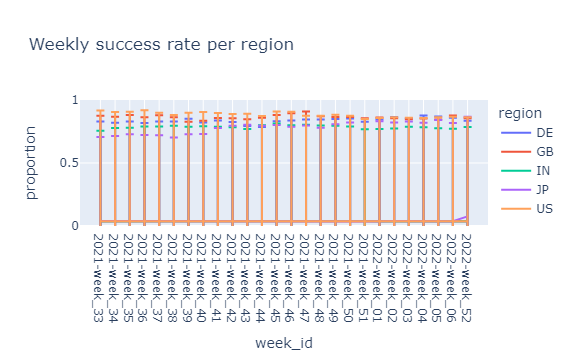

In [192]:
px.line(stats, x='week_id',y='proportion', error_y='ci95_lo', range_y=(0,1), color='region', 
        title='Weekly success rate per region')

In [165]:
#px.line(success_rate_by_region2, x='week_id',y='proportion')
success_rate_by_region2

,region,proportion,mean,count,std,ci95_hi,ci95_lo
0,DE,0.031040,0.814192,62177,0.388955,0.817249,0.811134
1,DE,0.030285,0.814192,62177,0.388955,0.817249,0.811134
2,DE,0.031056,0.814192,62177,0.388955,0.817249,0.811134
3,DE,0.030703,0.814192,62177,0.388955,0.817249,0.811134
4,DE,0.031169,0.814192,62177,0.388955,0.817249,0.811134
...,...,...,...,...,...,...,...
124,US,0.031903,0.856249,103846,0.350839,0.858383,0.854115
125,US,0.031980,0.856249,103846,0.350839,0.858383,0.854115
126,US,0.032182,0.856249,103846,0.350839,0.858383,0.854115
127,US,0.032298,0.856249,103846,0.350839,0.858383,0.854115


Produce the following requestser proportion graph:

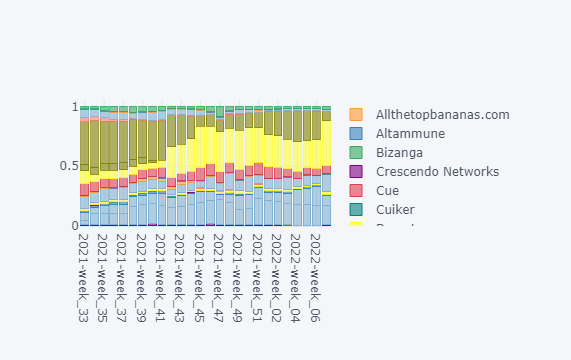

In [202]:
#25 Which are the requester to which we succeed the most?
best_req = ad_recs_annotated.groupby(['requester', 'is_success'], as_index=False)['ad_id'].count()
best_req['proportion'] = best_req.groupby('requester')['ad_id'].transform(lambda x: x / x.sum())
best_req['ad_id'].rename('num_of_ads')
best_req = best_req.rename(columns={'ad_id': 'num_of_ads'})
best_req_sorted = best_req.sort_values('proportion', ascending=False)
best_req_sorted = best_req_sorted.loc[best_req_sorted['num_of_ads'] > 100]
best_req_sorted

,requester,is_success,num_of_ads,proportion
44,PageBites,1,123,0.911111
12,"Doctorfun Entertainment, Ltd",1,182,0.892157
59,Tab Solutions,1,11829,0.889800
36,Mission Street Manufacturing,1,164,0.881720
18,Fancy,1,28519,0.881686
1,Allthetopbananas.com,1,187,0.865741
57,Sensor Tower,1,3021,0.862404
46,Pole Star,1,200,0.854701
65,iDreamsky Technology,1,9720,0.840249
6,Crescendo Networks,1,1620,0.838076


In [215]:
#26 Which are the requester to which we produce the most critical defects?
def_req = ad_recs_annotated.groupby(['requester', 'is_sever'], as_index=False)['ad_id'].count()


def_req['proportion'] = def_req.groupby('requester')['ad_id'].transform(lambda x: x / x.sum())


def_req = def_req.rename(columns={'ad_id': 'num_of_ads'})
def_req_sorted = def_req.sort_values('proportion', ascending=False)
def_req_sorted = def_req_sorted.loc[def_req_sorted['num_of_ads'] > 100]
def_req_sorted = def_req_sorted.loc[def_req_sorted['is_sever'] == 1]
def_req_sorted

,requester,is_sever,num_of_ads,proportion
30,Modanisa,1.0,1420,0.899873
14,Fancy,1.0,3108,0.812124
49,Tab Solutions,1.0,1125,0.766871
43,SOLOMO365,1.0,721,0.710345
3,Bizanga,1.0,291,0.689573
55,iDreamsky Technology,1.0,1273,0.688853
47,Sensor Tower,1.0,318,0.659751
38,Puentes Company,1.0,5160,0.656071
41,RelayFoods,1.0,9961,0.654597
5,Crescendo Networks,1.0,201,0.644231


In [216]:
#27 What is the overall success rate trend over time?

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)